<a href="https://colab.research.google.com/github/AlexeyTri/MLScratch/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Логистическая регрессия

**Задача:** классификация


In [28]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelBinarizer

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import PolynomialFeatures

import sympy

$z = 𝑋ϴ ⟶ h_θ(x) = \frac{1}{1+e^{-𝑋Θ}}$

In [2]:
def h(x, theta):
    z = np.dot(x, theta)
    return 1/1+np.exp(-z)

$
\begin{cases}
y = 1, h_ϴ(x) > 0,5 \\
y = 0, h_ϴ(x) < 0,5
\end{cases}
$

*Уравнение решающей границы:*

9$x2 = m*x1 + c$, где:

m - наклон прямой
c - сдвиг

$x2 = -\frac{ϴ_1}{ϴ_2}*x1 - \frac{ϴ_0}{ϴ_2}$


In [3]:
def stable_sigmoid(z):
    if z>=0:
        return 1/(1+np.exp(-z))
    else:
        return(np.exp(z)/(1+np.exp(z)))

In [4]:
def H(x, theta):
    z = np.dot(x, theta)

    return np.array([stable_sigmoid(value) for value in z])

In [5]:
theta = np.array([-3, 1, 1])
x = np.arange(1, 13).reshape(4, 3)

h(x, theta)

array([   1.13533528,    3.71828183,   55.59815003, 1097.63315843])

## Logistic loss

$J_ϴ = - \frac{1}{n}∑ y*(log(h_ϴ(x)|y=1) + (1-y)*(log(1-h_ϴ(x)|y=0))$




In [6]:
output = pd.DataFrame({
    "y": [1, 1, 1, 0, 0, 1, 1, 0],
    "y_pred": [0.82, 0.7, 0.93, 0.11, 0.7, 0.2, 0.3, 0.1]
})

output

,y,y_pred
0,1,0.82
1,1,0.70
2,1,0.93
3,0,0.11
4,0,0.70
5,1,0.20
6,1,0.30
7,0,0.10


In [7]:
output["y=1 pred"] = np.where(output["y"] == 1, output["y_pred"], 1 - output["y_pred"])

output

,y,y_pred,y=1 pred
0,1,0.82,0.82
1,1,0.70,0.70
2,1,0.93,0.93
3,0,0.11,0.89
4,0,0.70,0.30
5,1,0.20,0.20
6,1,0.30,0.30
7,0,0.10,0.90


In [8]:
output["-log"] = -np.log(output["y=1 pred"])
output

,y,y_pred,y=1 pred,-log
0,1,0.82,0.82,0.198451
1,1,0.70,0.70,0.356675
2,1,0.93,0.93,0.072571
3,0,0.11,0.89,0.116534
4,0,0.70,0.30,1.203973
5,1,0.20,0.20,1.609438
6,1,0.30,0.30,1.203973
7,0,0.10,0.90,0.105361


<ipython-input-9-f2e115b9a605>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(x_var, -np.log(x_var), c='b', label="-log(x)")


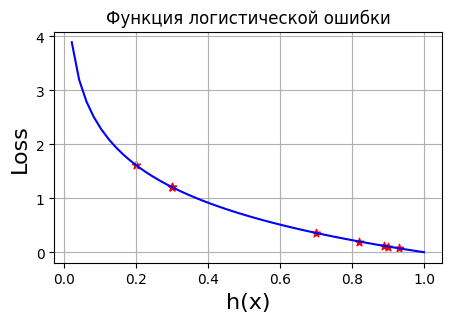

In [9]:
plt.figure(figsize=(5, 3))

x_var = np.linspace(0, 1)

plt.plot(x_var, -np.log(x_var), c='b', label="-log(x)")
plt.scatter(output["y=1 pred"], [output["-log"]], marker="*", c='r')

plt.xlabel("h(x)", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.title("Функция логистической ошибки")
plt.grid()

plt.show()

In [10]:
output['-log'].mean()

np.float64(0.6083718035621446)

In [11]:
def objective(y, y_pred):

  # рассчитаем функцию потерь для y = 1, добавив 1e-9, чтобы избежать ошибки при log(0)
  y_one_loss = y * np.log(y_pred + 1e-9)

  # также рассчитаем функцию потерь для y = 0
  y_zero_loss = (1 - y) * np.log(1 - y_pred + 1e-9)

  # сложим и разделим на количество наблюдений
  return -np.mean(y_zero_loss + y_one_loss)

In [12]:
objective(output['y'], output['y_pred'])

np.float64(0.6083718013590538)

In [13]:
def gradient(x, y, y_pred, n):
    return np.dot(x.T, (y_pred - y)) * (1/n)

In [14]:
from sympy import *

In [15]:
x, y, theta = symbols('x y theta')

Loss = y * log(1/(1 + exp(-(x * theta)))) + (1-y) * log(1 - (1/(1+exp(-(x * theta)))))

diff(Loss, theta).simplify()

x*(y + (y - 1)*exp(theta*x))/(exp(theta*x) + 1)

In [2]:
data = datasets.load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df = df[df['target'] != 2]
df['target'].unique()

array([0, 1])

In [17]:
df.shape, np.unique(df.target)

((130, 14), array([0, 1]))

## Отбор признаков

In [18]:
from scipy import stats

columns, correletions, correletionsPears = [], [], []

for col in df.drop('target', axis=1).columns:
    columns.append(col)
    correletions.append(stats.pointbiserialr(df[col], df['target'])[0])
    correletionsPears.append(stats.pearsonr(df[col], df['target'])[0])

pd.DataFrame({'columns': columns, 'correlation': correletions, 'corrPearson': correletionsPears}).style.background_gradient()

,columns,correlation,corrPearson
0,alcohol,-0.824399,-0.824399
1,malic_acid,-0.044302,-0.044302
2,ash,-0.354548,-0.354548
3,alcalinity_of_ash,0.470437,0.470437
4,magnesium,-0.383085,-0.383085
5,total_phenols,-0.532692,-0.532692
6,flavanoids,-0.610730,-0.610730
7,nonflavanoid_phenols,0.337489,0.337489
8,proanthocyanins,-0.249205,-0.249205
9,color_intensity,-0.750613,-0.750613


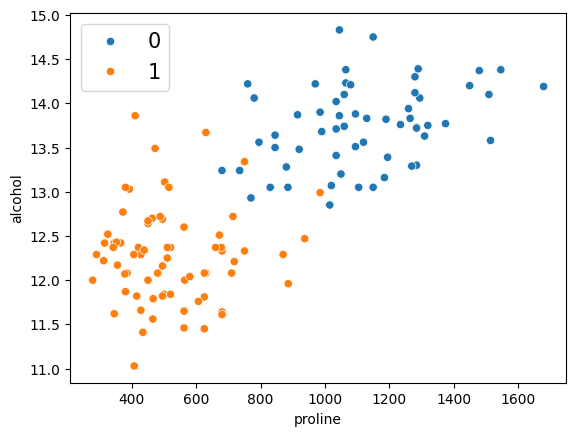

In [19]:
sns.scatterplot(x=df.proline, y=df.alcohol, hue=df.target)
plt.legend(loc='upper left', prop={'size': 15})
plt.show()

In [20]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [21]:
X = df[['alcohol', 'proline']]
y = df['target']

In [22]:
X = (X - X.mean())/X.std()
X.mean()

,0
alcohol,7.028566e-15
proline,-2.135044e-16


In [23]:
def add_ones(x):
    return x.insert(0, 'x0', np.ones(x.shape[0]))

In [24]:
add_ones(X)
X

,x0,alcohol,proline
0,1.0,1.446858,0.779851
1,1.0,0.287952,0.737300
2,1.0,0.242946,1.120264
3,1.0,1.604379,1.957113
4,1.0,0.332958,-0.156284
...,...,...,...
125,1.0,-0.983469,-1.169013
126,1.0,-0.578414,-1.242769
127,1.0,-1.298511,-0.919377
128,1.0,-0.645923,-1.271137


In [25]:
theta, n = np.zeros(X.shape[1]), X.shape[0]
theta, n

(array([0., 0., 0.]), 130)

In [26]:
loss_history = []

In [27]:
# в цикле из 20000 итераций
for i in range(20000):
  # рассчитаем прогнозное значение с текущими весами
  y_pred = H(X, theta)
  # посчитаем уровень ошибки при текущем прогнозе
  loss_history.append(objective(y, y_pred))
  # рассчитаем градиент
  grad = gradient(X, y, y_pred, n)
  # используем градиент для улучшения весов модели
  # коэффициент скорости обучения будет равен 0,001
  theta = theta - 0.001 * grad

In [28]:
theta, loss_history[-1]

(array([ 0.23234188, -1.73394252, -1.89350543]),
 np.float64(0.12282503517421262))

In [29]:
def predict(x, theta):
    z = np.dot(x, theta)
    probs = np.array([stable_sigmoid(value) for value in z])

    return np.where(probs>=0.5, 1, 0), probs

In [30]:
y_pred, probs = predict(X, theta)
y_pred[0], probs[0], y[0]

(np.int64(0), np.float64(0.022908352078195634), np.int64(0))

In [31]:
accuracy_score(y, y_pred)

0.9615384615384616

In [32]:
pd.DataFrame(confusion_matrix(y, y_pred),
             columns=['forecast 0', 'forecast 1'],
             index=['Actual 0', 'Actual 1'])

,forecast 0,forecast 1
Actual 0,57,2
Actual 1,3,68


In [33]:
c, m = -theta[0]/theta[2], -theta[1]/theta[2]
c, m

(np.float64(0.12270462635312818), np.float64(-0.915731474695505))

In [34]:
xmin, xmax = min(X['proline']), max(X['proline'])
ymin, ymax = min(X['alcohol']), max(X['alcohol'])

In [35]:
yd = m*np.array([xmin, xmax]) + c
yd

array([ 1.452979  , -2.18902976])

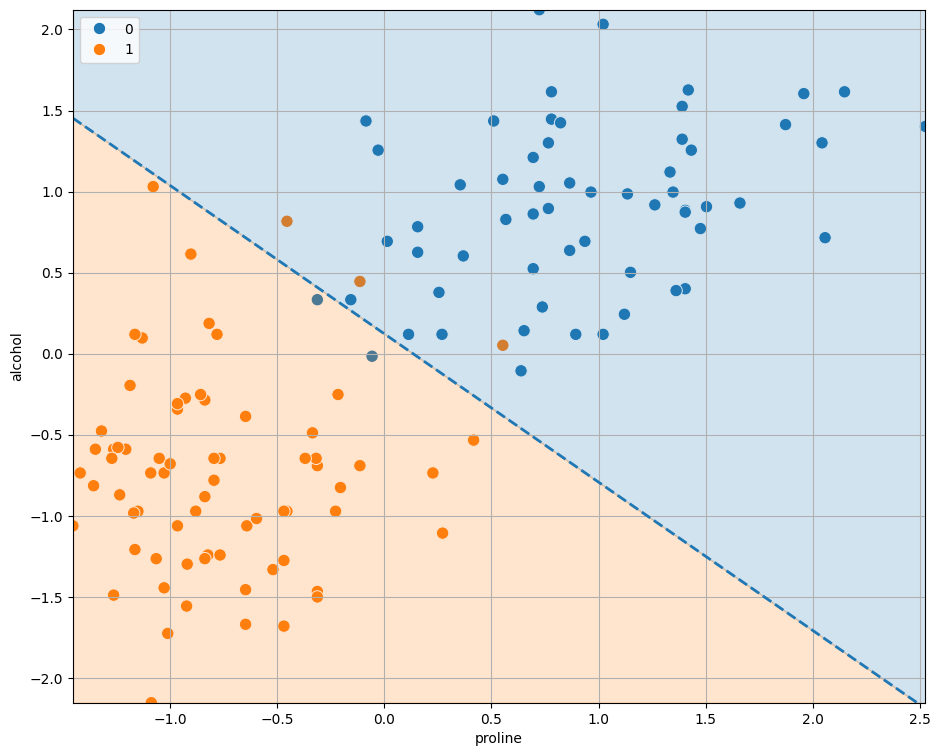

In [36]:
plt.figure(figsize=(11,9))

sns.scatterplot(x = X['proline'], y = X['alcohol'], hue=y, s=80)

plt.plot(np.array([xmin, xmax]), yd, '--', lw=2)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.fill_between(np.array([xmin, xmax]), yd, ymax, color='tab:blue', alpha=0.2)
plt.fill_between(np.array([xmin, xmax]), yd, ymin, color='tab:orange', alpha=0.2)

plt.legend(loc='upper left')
plt.grid()
plt.show()

In [37]:
class LogReg():

    def __init__(self):

        self.theta = None
        self.loss_history = []

    def fit(self, x, y, iter=20000, lr=0.001):

        x, y = x.copy(), y.copy()

        #self.normalize(x)
        self.add_ones(x)

        theta = np.zeros(x.shape[1])
        n = x.shape[0]

        loss_history = []

        for i in range(iter):

            y_pred = self.H(x, theta)

            loss_history.append(self.objective(y, y_pred))
            grad = self.gradient(x, y, y_pred, n)

            theta -= lr * grad

            self.theta = theta
            self.loss_history = loss_history


    def predict(self, x):
        x = x.copy()
        self.add_ones(x)
        z = np.dot(x, self.theta)

        probs = np.array([self.stable_sigmoid(value) for value in z])

        return np.where(probs>=0.5, 1, 0), probs

    def H(self, x, theta):
        z = np.dot(x, theta)
        return np.array([self.stable_sigmoid(value) for value in z])

    def stable_sigmoid(self, z):
        if z >=0:
            return 1/(1 + np.exp(-z))
        else:
            return (np.exp(z))/(np.exp(z) + 1)

    def objective(self, y, y_pred):
        y_ones_class = y * np.log(y_pred + 1e-9)
        y_zero_class = (1-y) * np.log(1 - y_pred + 1e-9)

        return -np.mean(y_ones_class + y_zero_class)

    def gradient(self, x, y, y_pred, n):
        return np.dot(x.T, (y_pred - y)) / n

    def add_ones(self, x):
        return x.insert(0, "x0", np.ones(x.shape[0]))

In [38]:
X = df[['alcohol', 'proline']]
y = df['target']

X = (X-X.mean())/X.std()

model = LogReg()
model.fit(X, y)

In [39]:
model.theta, model.loss_history[-1]

(array([ 0.23234188, -1.73394252, -1.89350543]),
 np.float64(0.12282503517421262))

In [40]:
y_pred, probs = model.predict(X)

y_pred[0], probs[0]

(np.int64(0), np.float64(0.022908352078195634))

In [41]:
accuracy_score(y, y_pred)

0.9615384615384616

In [42]:
pd.DataFrame(confusion_matrix(y, y_pred), columns=['forecast 0', 'forecast 1'], index=['actual 0', 'actual 1'])

,forecast 0,forecast 1
actual 0,57,2
actual 1,3,68


In [50]:
# сравнние в sklearn

X = df[['alcohol', 'proline']]
y = df['target']

scale = StandardScaler()
X = scale.fit_transform(X)

model = LogisticRegression()
model.fit(X, y)

model.intercept_, model.coef_

(array([0.30870095]), array([[-2.0893804 , -2.45394934]]))

In [51]:
y_pred = model.predict(X)

probs = model.predict_proba(X)

y_pred[0], probs[0]

(np.int64(0), array([0.99050217, 0.00949783]))

In [52]:
accuracy_score(y_pred, y)

0.9615384615384616

In [53]:
pd.DataFrame(confusion_matrix(y_pred, y),
             columns=['forecast 0', 'forecast 1'],
             index=['real 0', 'real 1'])

,forecast 0,forecast 1
real 0,57,3
real 1,2,68


In [59]:
c, m = -model.intercept_/model.coef_[0][1], \
      -model.coef_[0][0]/model.coef_[0][1]

yd = np.array([xmin, xmax])*m + c

In [92]:
X = pd.DataFrame(X, columns=[['alcohol', 'proline']])
np.array(X.iloc[:, 0])

array([ 1.452455  ,  0.28906609,  0.24388594,  1.61058554,  0.33424624,
        1.41856989,  1.63317561,  1.26043936,  2.13015729,  1.0345386 ,
        1.30561951,  1.32820959,  0.91029318,  2.03979698,  1.62188057,
        0.77475272,  1.53152027,  1.00065348,  1.40727485,  0.78604776,
        1.26043936, -0.01589994,  0.86511303, -0.10626024,  0.62791723,
        0.11964052,  0.50367181,  0.40201647,  1.04583364,  1.21525921,
        0.8877031 ,  0.71827753,  0.83122791,  0.92158822,  0.63921227,
        0.60532715,  0.37942639,  0.11964052,  0.14223059,  1.44115997,
        0.69568746,  0.52626189,  1.05712867,  0.33424624,  0.11964052,
        1.42986493,  1.62188057,  1.07971875,  1.30561951,  1.1248989 ,
        0.11964052,  1.00065348,  0.98935845,  0.93288326,  0.89899814,
        0.69568746,  1.44115997,  0.39072143,  0.87640807, -0.64842207,
       -0.69360222, -0.34345604,  0.81993288, -0.64842207, -0.87432283,
       -0.64842207,  0.18741075, -0.64842207,  0.44719662, -0.82

<Axes: >

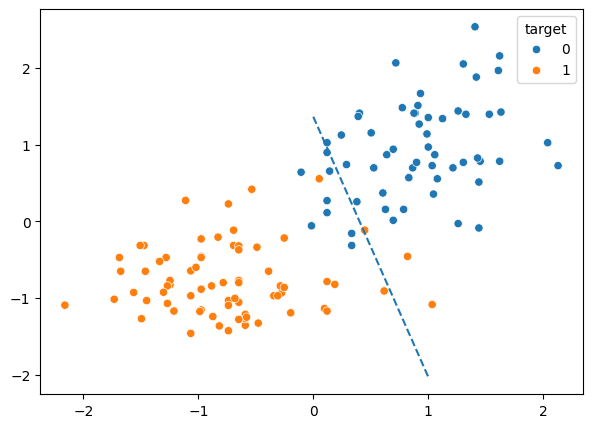

In [97]:
plt.figure(figsize=(7, 5))
plt.plot(yd, '--')

sns.scatterplot(x=np.array(X.iloc[:, 0]), \
                y=np.array(X.iloc[:, 1]), \
                hue=y)

***Уравнение полинома на основе двух признаков***

$y=θ_0 + θ_1*x_1 + θ_2*x_2 + θ_3*x_1^2 + \theta_4*x_1*x_2 + \theta_5*x_2^2$

In [114]:
X = df[['alcohol', 'proline']]
y = df['target']
scaler = StandardScaler()
X = (X - X.mean())/X.std()

In [155]:
polynomial_features = PolynomialFeatures(degree = 3)
X_poly = polynomial_features.fit_transform(X)

In [150]:
X_poly[0]

array([ 1.        ,  1.44685785,  0.77985116,  2.09339765,  1.12833378,
        0.60816783,  3.02884883,  1.63253859,  0.87993241,  0.47428039,
        4.38231372,  2.36205128,  1.27313711,  0.68621631,  0.36986811,
        6.34058503,  3.41755244,  1.84204843,  0.99285746,  0.53514658,
        0.28844208,  9.17392525,  4.9447126 ,  2.66518224,  1.43652361,
        0.77428104,  0.41733469,  0.22494189, 13.2733658 ,  7.15429626,
        3.85613986,  2.07844546,  1.1202746 ,  0.60382397,  0.32545894,
        0.17542119, 19.20467357, 10.35124973,  5.57928624,  3.00721515,
        1.62087811,  0.87364745,  0.47089282,  0.25380953,  0.13680242,
       27.78643279, 14.97678697,  8.07243412,  4.35101285,  2.34518022,
        1.26404367,  0.68131498,  0.36722631,  0.19793366,  0.10668553,
       40.20301852, 21.66928187, 11.67966471,  6.29529712,  3.39314242,
        1.82889152,  0.98576593,  0.53132428,  0.28638187,  0.15435879,
        0.08319883])

In [156]:
poly_model = LogisticRegression()

poly_model = poly_model.fit(X_poly, y)

poly_predict = poly_model.predict(X_poly)

accuracy_score(poly_predict, y)

0.9615384615384616

In [157]:
pd.DataFrame(confusion_matrix(poly_predict, y),
             columns = ['forecast 0', 'forecast 1'],
             index = ['real 0', 'real 1'])

,forecast 0,forecast 1
real 0,57,3
real 1,2,68


In [129]:
sum(y_pred == df['target'])

125

In [158]:
predictions = df[['alcohol', 'proline']].copy()
predictions['y_pred'] = poly_predict
predictions.head(2)

,alcohol,proline,y_pred
0,14.23,1065.0,0
1,13.20,1050.0,0


In [159]:
df[['alcohol', 'proline', 'target']]

,alcohol,proline,target
0,14.23,1065.0,0
1,13.20,1050.0,0
2,13.16,1185.0,0
3,14.37,1480.0,0
4,13.24,735.0,0
...,...,...,...
125,12.07,378.0,1
126,12.43,352.0,1
127,11.79,466.0,1
128,12.37,342.0,1


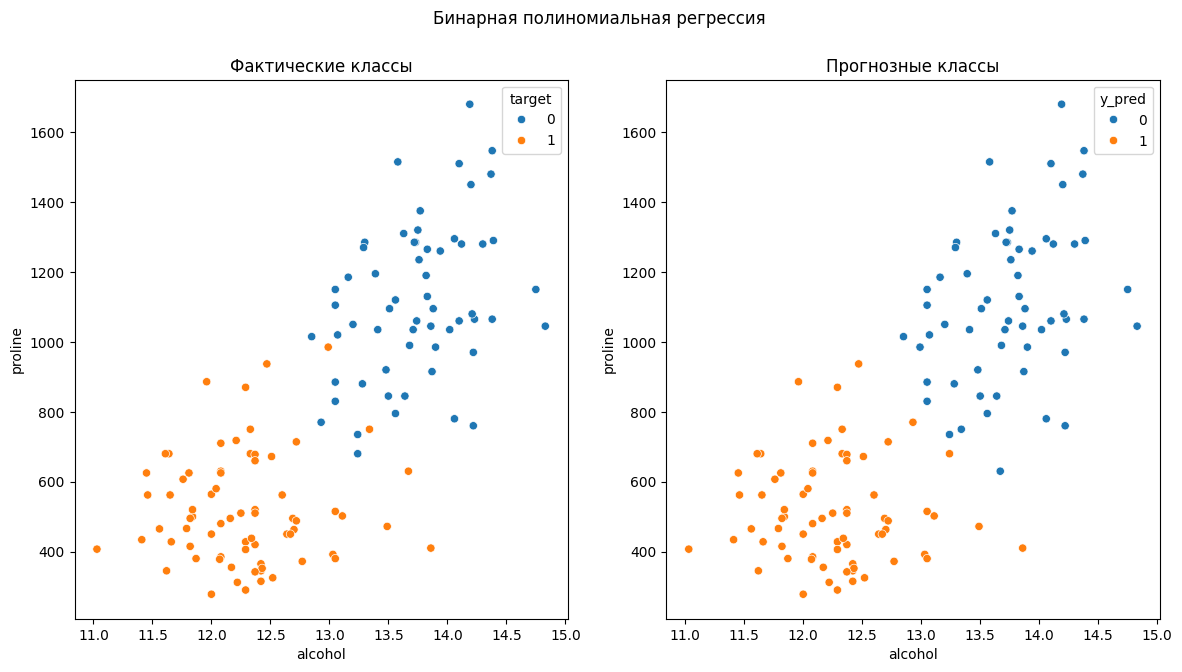

In [160]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'wspace': 0.2})

sns.scatterplot(data=df, x='alcohol', y='proline', hue='target', ax=ax1)
ax1.set_title('Фактические классы')

sns.scatterplot(data=predictions, x='alcohol', y='proline', hue='y_pred', ax=ax2)
ax2.set_title('Прогнозные классы')

fig.suptitle('Бинарная полиномиальная регрессия')

plt.show()

In [162]:
data = datasets.load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)

df = (df - df.mean())/ df.std()

df['target'] = data.target

df.target.value_counts()

,count
target,
1,71
0,59
2,48


In [163]:
def correlation_ratio(numerical, categorical):
    values = np.array(numerical)
    ss_total = np.sum((values - values.mean()) ** 2)

    cats = np.unique(categorical, return_inverse=True)[1]

    ss_betweengruops = 0

    for c in np.unique(cats):

        group = values[np.argwhere(cats == c).flatten()]
        ss_betweengruops += len(group) * (group.mean() - values.mean()) ** 2

    return np.sqrt(ss_betweengruops/ss_total)

In [164]:
columns, correlations = [], []

for col in df.drop('target', axis = 1).columns:
    columns.append(col)

    correlations.append(correlation_ratio(df[col], df['target']))

pd.DataFrame({'column': columns, 'correlation': correlations}).style.background_gradient()

,column,correlation
0,alcohol,0.779024
1,malic_acid,0.544857
2,ash,0.363394
3,alcalinity_of_ash,0.538689
4,magnesium,0.352680
5,total_phenols,0.719163
6,flavanoids,0.853098
7,nonflavanoid_phenols,0.489519
8,proanthocyanins,0.506986
9,color_intensity,0.761353


In [166]:
df = df[['flavanoids', 'proline', 'target']].copy()
df.head(3)

,flavanoids,proline,target
0,1.031908,1.010159,0
1,0.731565,0.962526,0
2,1.212114,1.391224,0


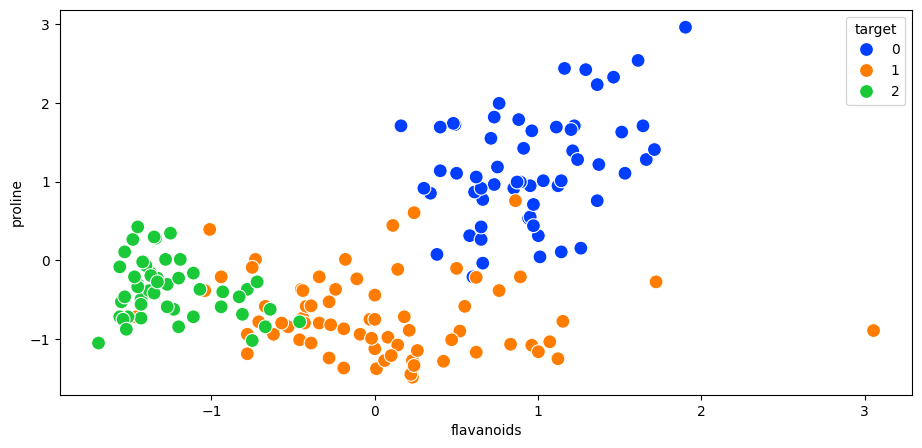

In [168]:
plt.figure(figsize=(11, 5))

sns.scatterplot(x=df['flavanoids'], y=df['proline'], hue=df['target'], palette='bright', s=100)

plt.show()

**ONE-VS-REST**

$h_θ^(i)(x) = P(y=i|x; θ), i\in{0, 1, 2}$

In [174]:
x1, x2 = df.columns[0], df.columns[1]

target = df.target.unique()

target

array([0, 1, 2])

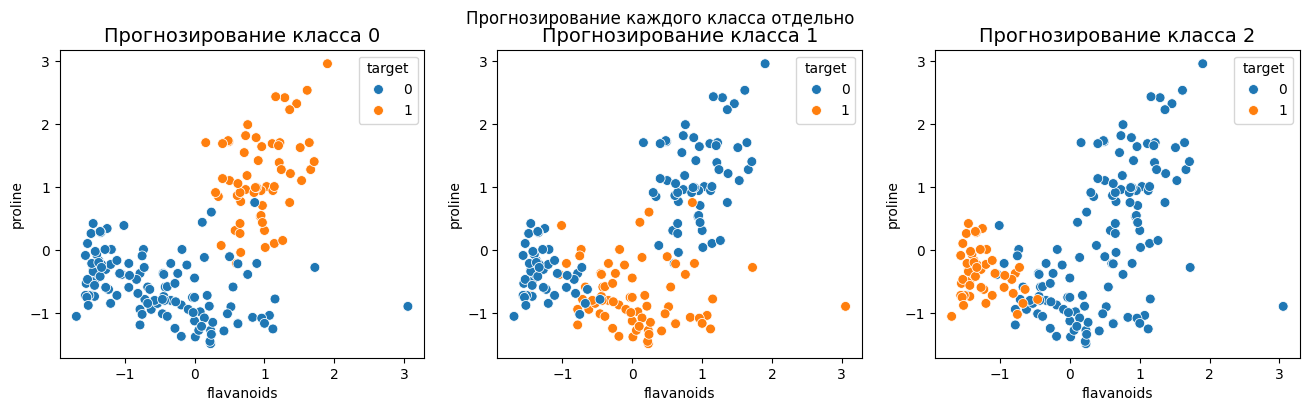

In [185]:
ov1, ov2, ov3 = df.copy(), df.copy(), df.copy()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4), gridspec_kw={'wspace':0.2, 'hspace': 0.08})

ov1['target'] = np.where(df['target'] == target[0], 1, 0)
ov2['target'] = np.where(df['target'] == target[1], 1, 0)
ov3['target'] = np.where(df['target'] == target[2], 1, 0)

sns.scatterplot(data=ov1, x=x1, y=x2, hue='target', s=50, ax=ax1)
ax1.set_title('Прогнозирование класса 0', fontsize=14)
sns.scatterplot(data=ov2, x=x1, y=x2, hue='target', s=50, ax=ax2)

ax2.set_title('Прогнозирование класса 1', fontsize=14)
sns.scatterplot(data=ov3, x=x1, y=x2, hue='target', s=50, ax=ax3)

ax3.set_title('Прогнозирование класса 2', fontsize=14)

fig.suptitle('Прогнозирование каждого класса отдельно')
plt.show()

In [186]:
models = []

for ov_ in [ov1, ov2, ov3]:
    X = ov_[['flavanoids', 'proline']]
    y = ov_['target']

    model = LogReg()
    model.fit(X, y)

    models.append(model)

In [187]:
models[0].theta

array([-0.99971466,  1.280398  ,  2.04834457])

In [188]:
X = df[['flavanoids', 'proline']]
y = df['target']

probs = []

for model in models:
    _, prob = model.predict(X)
    probs.append(prob)

probs[0][1], probs[1][0], probs[2][0]

(np.float64(0.8708579242397041),
 np.float64(0.15409133953450904),
 np.float64(0.02662113260010316))

In [196]:
all_probs = np.concatenate(probs, axis=0).reshape(len(probs), -1).T
all_probs.shape

(178, 3)

In [205]:
np.argmax(all_probs[10])

y_pred = np.argmax(all_probs, axis=1)

accuracy_score(y, y_pred)

0.9157303370786517

In [202]:
pd.DataFrame(confusion_matrix(y_pred, y),
             columns=['forecast 0', 'forecast 1', 'forecast 2'],
             index= ['actual 0', 'actual 1', 'actual 2'])

,forecast 0,forecast 1,forecast 2
actual 0,57,3,0
actual 1,2,62,4
actual 2,0,6,44


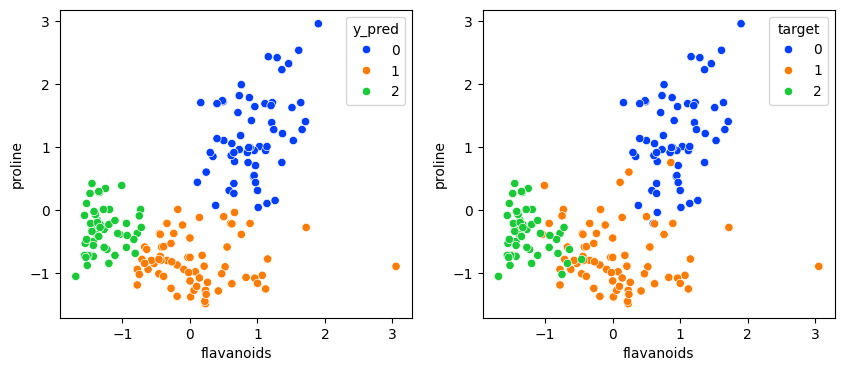

In [211]:
predictions = df[['flavanoids', 'proline']].copy()
predictions['y_pred'] = y_pred

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'wspace': 0.2})

sns.scatterplot(data = predictions, x = 'flavanoids', y = 'proline', hue = 'y_pred', palette='bright', ax=ax1)

sns.scatterplot(data = df, x = 'flavanoids', y = 'proline', hue = 'target', palette='bright', ax=ax2)

plt.show()

In [223]:
class OVR_LogReg():

    def __init__(self):
        self.models_thetas = []
        self.models_loss = []

    def fit(self, x, y, iter=20000, learning_rate=0.001):

        dfs = self.preprocessing(x, y)

        models_thetas, models_loss = [], []

        for ovr_df in dfs:

            x = ovr_df.drop('target', axis=1).copy()
            y = ovr_df.target.copy()

            self.add_ones(x)

            loss_history = []
            thetas, n = np.zeros(x.shape[1]), x.shape[1]

            for i in range(iter):
                y_pred = self.h(x, thetas)
                loss_history.append(self.objective(y_pred, y))
                grad = self.gradient(x, y, y_pred, n)
                thetas -= learning_rate * grad

            models_thetas.append(thetas)
            models_loss.append(loss_history)

        self.models_thetas = models_thetas
        self.models_loss = models_loss

    def predict(self, x):
        x = x.copy()
        probs = []

        self.add_ones(x)
        for t in self.models_thetas:
            z = np.dot(x, t)
            prob = np.array([self.stable_sigmoid(value) for value in z])
            probs.append(prob)

        all_probs = np.concatenate(probs, axis = 0).reshape(len(probs), -1).T
        y_pred = np.argmax(all_probs, axis = 1)

        return y_pred, all_probs

    def preprocessing(self, x, y):
            x, y = x.copy(), y.copy()

            x['target'] = y
            classes = x.target.unique()

            dfs = []
            ovr_df = None

            for c in classes:
                ovr_df = x.drop('target', axis=1).copy()
                ovr_df['target'] = np.where(x['target'] == classes[c], 1, 0)
                dfs.append(ovr_df)

            return dfs

    def add_ones(self, x):
        return x.insert(0, 'x0', np.ones(x.shape[0]))

    def h(self, x, thetas):
        z = np.dot(x, thetas)
        return np.array([self.stable_sigmoid(value) for value in z])

    def objective(self, y, y_pred):
        y_one_loss = y * np.log(y_pred + 1e-9)
        y_zero_loss = (1 - y) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)

    def gradient(self, x, y, y_pred, n):
        return np.dot(x.T, (y_pred - y)) / n

    def stable_sigmoid(self, z):
        if z >= 0:
            return 1/(1 + np.exp(-z))
        else:
            return np.exp(z)/(1 + np.exp(z))

In [224]:
X = df[['flavanoids', 'proline']]
y = df['target']
model = OVR_LogReg()
model.fit(X, y)

y_pred, probs = model.predict(X)

accuracy_score(y_pred, y)

0.898876404494382

In [227]:
from sklearn.multiclass import OneVsRestClassifier
X = df[['flavanoids', 'proline']]
y = df['target']
model = OneVsRestClassifier(LogisticRegression())
model_fit = model.fit(X, y)
y_pred = model_fit.predict(X)

accuracy_score(y_pred, y)

0.898876404494382

In [230]:
X = df[['flavanoids', 'proline']]
y = df['target']

polynom = PolynomialFeatures(degree = 7)
polynom_X = polynom.fit_transform(X)

model = OneVsRestClassifier(LogisticRegression())
model.fit(polynom_X, y)
y_pred = model.predict(polynom_X)
accuracy_score(y_pred, y)

0.9157303370786517

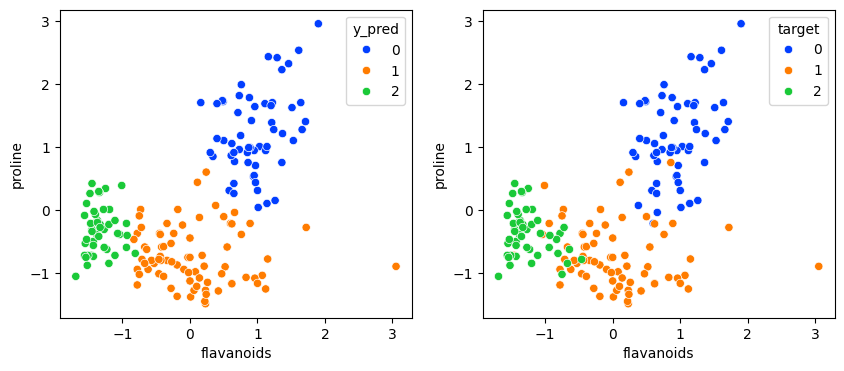

In [231]:
predictions = df[['flavanoids', 'proline']].copy()
predictions['y_pred'] = y_pred

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'wspace': 0.2})

sns.scatterplot(data = predictions, x = 'flavanoids', y = 'proline', hue = 'y_pred', palette='bright', ax=ax1)

sns.scatterplot(data = df, x = 'flavanoids', y = 'proline', hue = 'target', palette='bright', ax=ax2)

plt.show()

In [3]:
def add_ones(x):
    return x.insert(0, 'x0', np.ones(x.shape[0]))

In [20]:
data = datasets.load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df = (df-df.mean())/df.std()

df['target'] = data.target
df.target.value_counts()

,count
target,
1,71
0,59
2,48


In [22]:
X = df[['flavanoids', 'proline']]
add_ones(X)
X.head()

,x0,flavanoids,proline
0,1.0,1.031908,1.010159
1,1.0,0.731565,0.962526
2,1.0,1.212114,1.391224
3,1.0,1.462399,2.328007
4,1.0,0.661485,-0.037767


In [53]:
df['target'].value_counts()

,count
target,
1,71
0,59
2,48


In [60]:
def ohe(y):
    examples, features = y.shape[0], len(np.unique(y))
    zero_matrix = np.zeros((examples, features))
    for i, (row, digit) in enumerate(zip(zero_matrix, y)):
        zero_matrix[i][digit] = 1

    return zero_matrix

In [61]:
y = df['target']

y_enc = ohe(df['target'])
y_enc[:100]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [31]:
lb = LabelBinarizer()

y_lb = lb.fit_transform(y)

y_lb[:3]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

$softmax(z)_i = \frac{e^{z_i}}{∑_{k=1}^Ne^{z_k}}$

$z = - X * \theta$

In [34]:
thetas = np.zeros((3, 3))

In [36]:
z = np.dot(X, thetas)
z.shape

(178, 3)

$softmax(z)_i = \frac{e^{z_i - max(z)}}{∑_{k=1}^Ne^{z_k-max(z)}}$

In [38]:
np.max(z, axis=-1, keepdims=True).shape

(178, 1)

In [39]:
z = z - np.max(z, axis=-1, keepdims=True)
z[:5]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [40]:
numerator = np.exp(z)
denominator = np.sum(numerator, axis=-1, keepdims=True)
denominator[:3]

array([[3.],
       [3.],
       [3.]])

In [41]:
softmax = numerator / denominator
softmax[:4]

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [46]:
def stable_softmax(x, thetas):
    z = np.dot(-x, thetas)
    z = z - np.max(z, axis=-1, keepdims=True)
    numerator = np.exp(z)
    denominator = np.sum(numerator, axis=-1, keepdims=True)
    softmax = numerator / denominator
    return softmax

In [47]:
probs = stable_softmax(X, thetas)
probs[:4]

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

$L(y_{ohe}, softmax) = - \sum y_{ohe} · log(softmax)$

In [43]:
def cross_entropy(probs, y_enc, epsilon=1e-9):
    n = probs.shape[0]
    ce = -np.sum(y_enc * np.log(probs + epsilon)) / n
    return ce

In [62]:
ce = cross_entropy(probs, y_enc)

ce

np.float64(1.0986122856681098)

$∇_{θ}J = X^T ⋅ (y_{ohe} - softmax) ⋅ \frac{1}{n}$

In [64]:
def gradient_softmax(x, probs, y_enc):
    grad = np.array(np.dot(x.T, (y_enc - probs)) / probs.shape[0])
    return grad

In [65]:
gradient_softmax(X, probs, y_enc)

array([[-0.00187266,  0.06554307, -0.06367041],
       [ 0.31627721,  0.02059572, -0.33687293],
       [ 0.38820566, -0.28801792, -0.10018774]])

In [68]:
loss_history = []

for i in range(30000):
    probs = stable_softmax(X, thetas)
    loss_history.append(cross_entropy(probs, y_enc, epsilon=1e-9))
    grad = gradient_softmax(X, probs, y_enc)

    thetas -= 0.002 * grad

In [69]:
thetas

array([[ 0.109393  , -0.9423251 ,  0.8329321 ],
       [-1.81147256, -0.8010948 ,  2.61256736],
       [-1.97713744,  1.78561811,  0.19151932]])

In [70]:
loss_history[0], loss_history[-1]

(np.float64(0.42645012407607175), np.float64(0.25461306949334916))

In [71]:
y_pred = np.argmax(stable_softmax(X, thetas), axis=1)
accuracy_score(y_pred, y)

0.9044943820224719

In [72]:
pd.DataFrame(confusion_matrix(y, y_pred),
             columns=['Forecast 0','Forecast 1','Forecast 2'],
             index = ['Real 0', 'Real 1', 'Real 2'])

,Forecast 0,Forecast 1,Forecast 2
Real 0,56,3,0
Real 1,3,62,6
Real 2,0,5,43


In [ ]:
# написать самому!

In [75]:
X = df[['flavanoids', 'proline']]
y = df['target']

model = LogisticRegression()

model.fit(X, y)

y_pred = model.predict(X)
accuracy_score(y_pred, y)

0.898876404494382

In [76]:
pd.DataFrame(confusion_matrix(y, y_pred),
             columns=['Forecast 0','Forecast 1','Forecast 2'],
             index = ['Real 0', 'Real 1', 'Real 2'])

,Forecast 0,Forecast 1,Forecast 2
Real 0,56,3,0
Real 1,3,62,6
Real 2,0,6,42
